# Part II - Insight into the performance of borrowers and how it can supprt the decision making process of the company for maximal profit and minimal loss
## by Olalekan Akinpelu

## Investigation Overview


The goal of our presentation is to provide quality insight that can help the company make better decisions, which can then help maximise profit and minimise loss. We will be doing this by presenting to you the performance of borrowers with respect to the status of their dept and the returns from it.


## Dataset Overview


The dataset we analysed is a Loan Data from Prosper. It contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [9]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

%config InlineBbackend.figure_format='retina'

In [10]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [31]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

## (Visualization 1)

From our early analysis, we realise that there is no form of relationship between Estimated Returns and Actual Returns. Which means that what the company do estimate to be the return they will get doesn't align with the actual return. 

In [15]:
# Calculate the Formula for Actual Returns, then compare with estimated returns, in order to know if Prosper Loan made profit or lose.
df['ActualReturns'] = df.LP_CustomerPayments - df.LoanOriginalAmount - (df.LP_ServiceFees + df.LP_CollectionFees + df.LP_NetPrincipalLoss)
df['ActualReturns'] = 1 + (df.ActualReturns / df.LoanOriginalAmount)

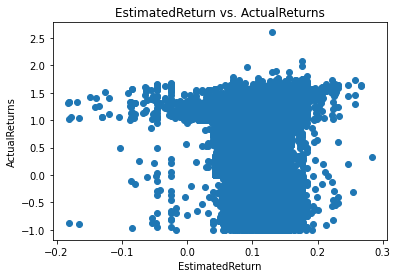

In [41]:
plt.scatter(df.EstimatedReturn, df.ActualReturns)
plt.title('EstimatedReturn vs. ActualReturns')
plt.xlabel('EstimatedReturn')
plt.ylabel('ActualReturns');

## (Visualization 2)

This plots looks intresting... This is simply because the borrowers with no income range, seems to have the highest actual returns. How is this so? Well it might be due to a whole lot of factors that we don't know about. Also we could see that those with the highest actual rating are those who have the highest actual returns. Meaning that although, high rating determines high return, that does not necessarily mean that those with high income range are the ones that produces high return. Hence, the company should not just focus on those with high income range alone, as the ones with low income range can also yield high actual returns.

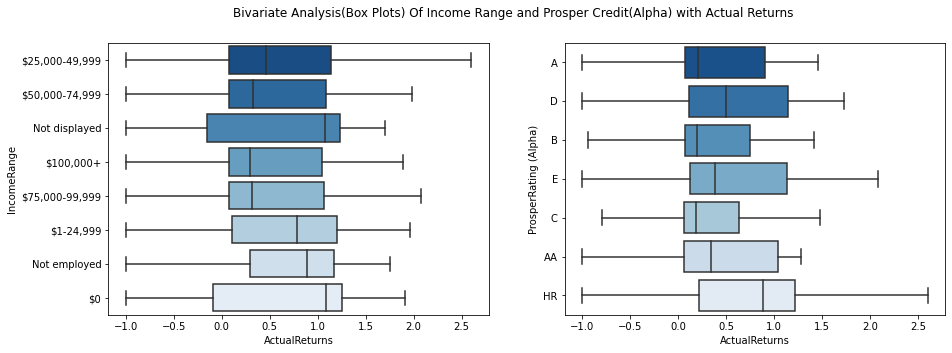

In [20]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.boxplot(data = df, y = 'IncomeRange', x = 'ActualReturns', palette = "Blues_r", showfliers = False)

plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
plt.suptitle('Bivariate Analysis(Box Plots) Of Income Range and Prosper Credit(Alpha) with Actual Returns')
sb.boxplot(data = df, y = 'ProsperRating (Alpha)', x = 'ActualReturns', palette = "Blues_r", showfliers = False);

## (Visualization 3)

According to logical deduction, we can say that High Prosper credit ratings are not only allocated to those with High income range, Meaning income ranges are not only what are used for the determination of ratings.
This further buttress our point that the company shouldn't associate high income range with actual return. 

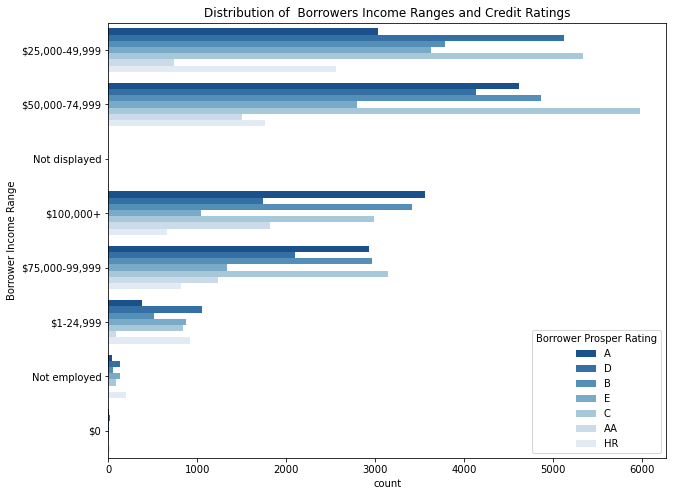

In [21]:
# clustered bar chart
plt.figure(figsize = [10,8])

ax = sb.countplot(data = df, y = 'IncomeRange', hue = 'ProsperRating (Alpha)',
                   palette = 'Blues_r')

ax.legend(title = 'Borrower Prosper Rating')
plt.title('Distribution of  Borrowers Income Ranges and Credit Ratings')
plt.ylabel('Borrower Income Range');

## Conclusion

Our analysis is a testimony to the fact that data analysis (collection and analysis of data) is key to making good business or organisational decisions, and this company must priortise it. Relying on intuition alone is not wise as proven by our report. Our mere intuition may make us believe that in a situation where some of the borrowers pay on time or high return was derived from them, people with high income will always perform better while people with low income will not. It is not always correct to think this way. 

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [22]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 671128 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HP\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  Fil

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 